In [24]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

path_out = 'C:/skoltech_hand_writing'
subj = ''
code=...

In [25]:
raw_data=mne.io.read_raw_edf(f'{path_out}/hand_writing/{subj}/{subj}_handwriting.edf', preload=True)
fs=raw_data.info['sfreq']
first_samp=raw_data.first_samp

Extracting EDF parameters from C:\skoltech_hand_writing\hand_writing\S107\S107_handwriting.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6193151  =      0.000 ...  3024.000 secs...


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\809476866.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data=mne.io.read_raw_edf(f'{path_out}/hand_writing/{subj}/{subj}_handwriting.edf', preload=True)
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\809476866.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data=mne.io.read_raw_edf(f'{path_out}/hand_writing/{subj}/{subj}_handwriting.edf', preload=True)


In [26]:
# look at the channels
eeg_channels = [i for i in raw_data.ch_names if 'EEG' in i]
eeg_channels

['EEG L.vis_1',
 'EEG L.vis_2',
 'EEG L.vis_3',
 'EEG L.vis_4',
 'EEG R.vis_1',
 'EEG R.vis_2',
 'EEG R.vis_3',
 'EEG R.vis_4']

In [27]:
# drop Mk channel
raw_data.drop_channels(raw_data.ch_names[-1])

Measurement date,"February 01, 2023 14:25:15 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,10 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,1.00 Hz
Lowpass,50.00 Hz


## Raw data preprocessing 

In [28]:
# apply notch + additional notch to remove possibe effects in the +-notch_width/2 frequencies
raw_data.notch_filter(np.arange(0, fs/2,50)[1:])
raw_data.notch_filter(np.arange(0, 400/2,50)[1:], notch_widths=2)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 s)



Measurement date,"February 01, 2023 14:25:15 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,10 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,1.00 Hz
Lowpass,50.00 Hz


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_data.copy().pick(i).plot_psd()
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.copy().pick(i).plot_psd()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_data.copy().pick(i).plot_psd()
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.copy().pick(i).plot_psd()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_data.copy().pick(i).plot_psd()
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.copy().pick(i).plot_psd()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_data.copy().pick(i).plot_psd()
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.copy().pick(i).plot_psd()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_data.copy().pick(i).plot_psd()
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.copy().pick(i).plot_psd()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_data.copy().pick(i).plot_psd()
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.copy().pick(i).plot_psd()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_data.copy().pick(i).plot_psd()


Need more than one channel to make topography for eeg. Disabling interactivity.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.copy().pick(i).plot_psd()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_data.copy().pick(i).plot_psd()
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\3662298868.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_data.copy().pick(i).plot_psd()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


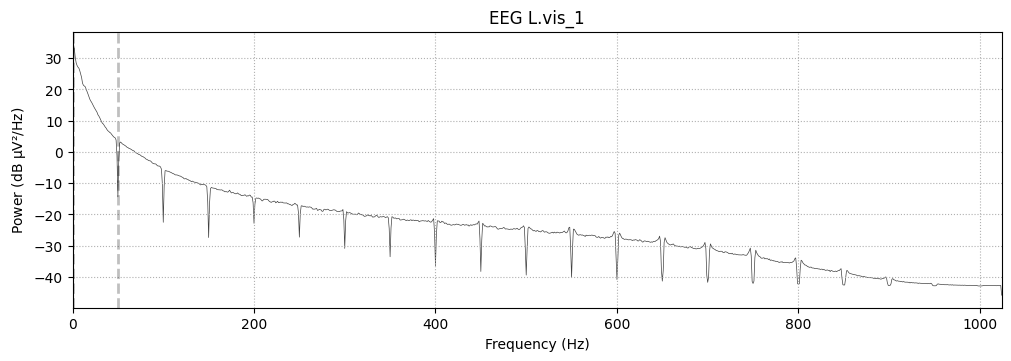

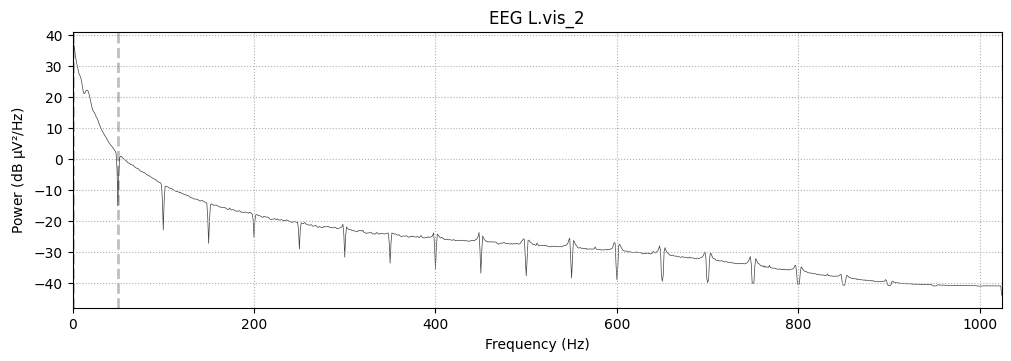

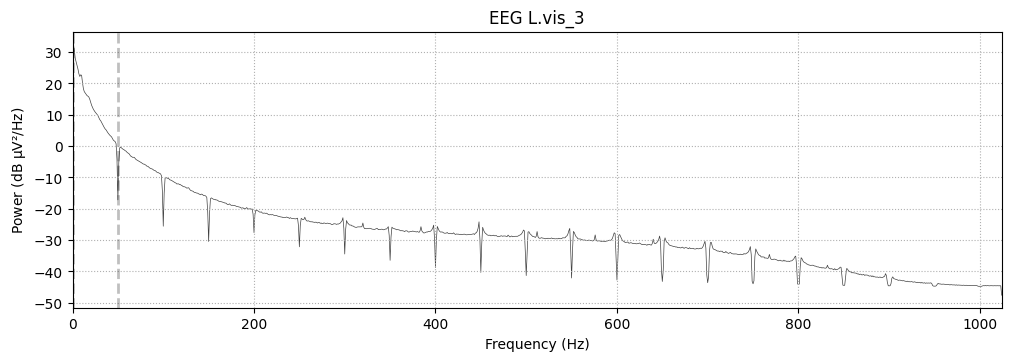

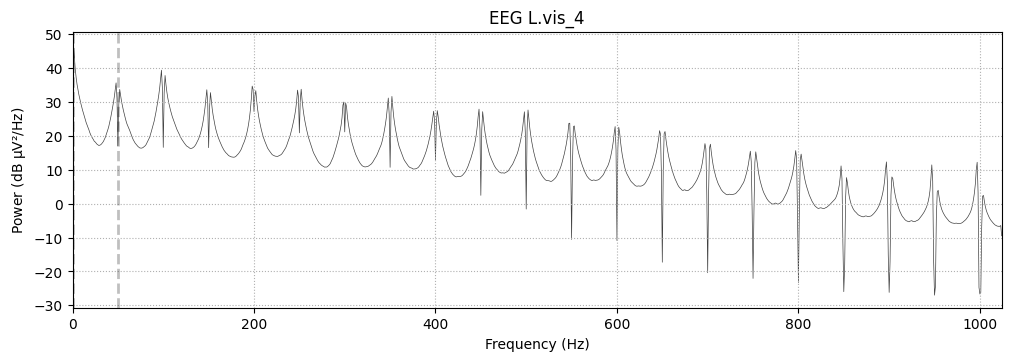

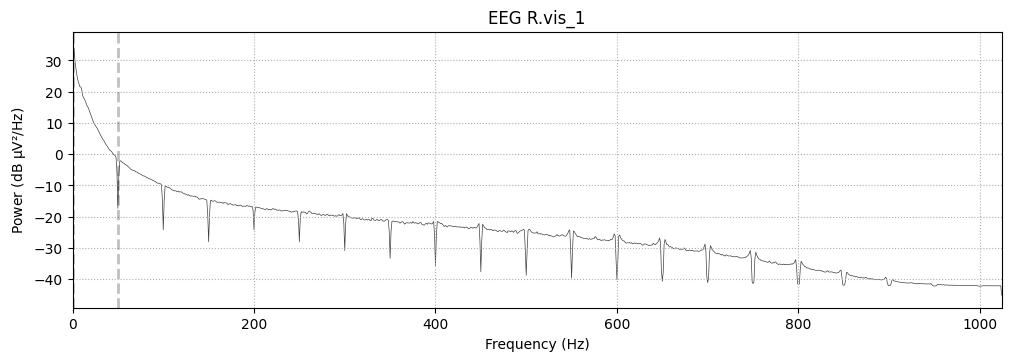

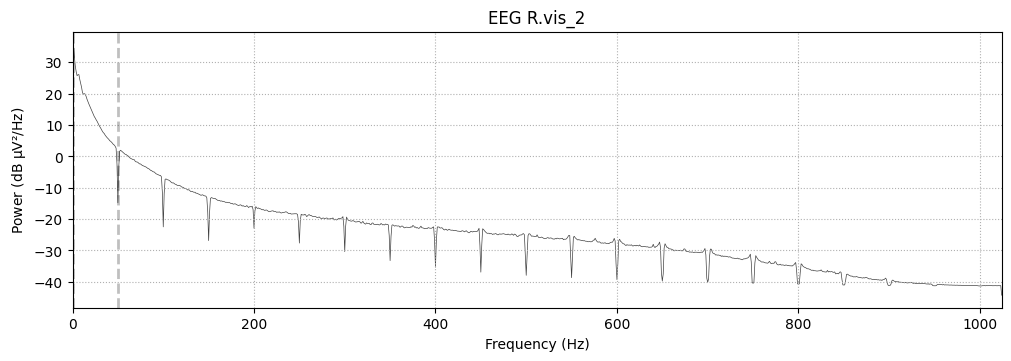

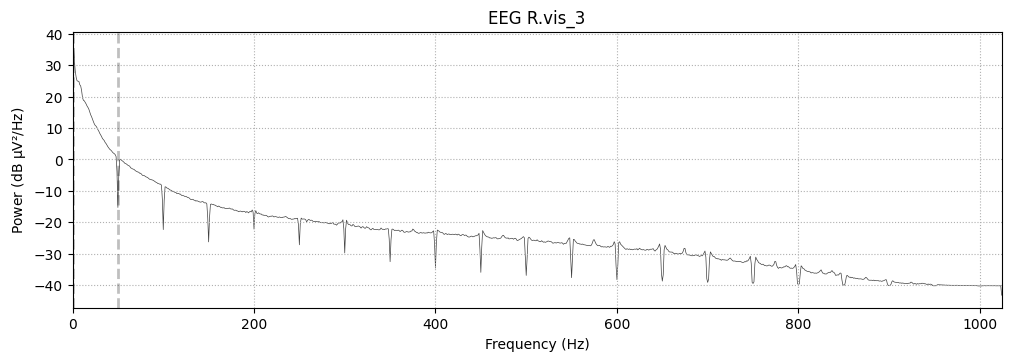

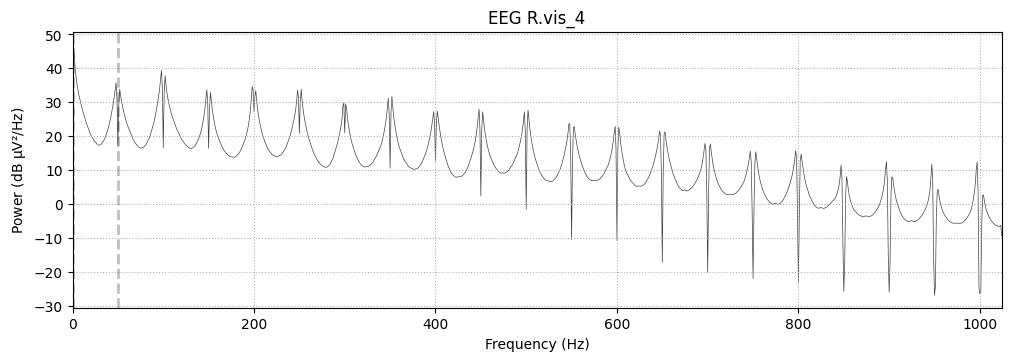

In [29]:
# plot PSD for each EEG channel separately
for i in eeg_channels:
    raw_data.copy().pick(i).plot_psd()
    plt.title(i)

In [31]:
# ADD BAD CHANNELS FOR EACH SUBJECT:
if subj == 'S102':
    bad_chs=['EEG R.lob_8', 'EEG R.vis_8'] # for subj = 'S102'
    raw_data.drop_channels(bad_chs)
elif subj == 'S107':
    bad_chs=['EEG L.vis_4', 'EEG R.vis_4'] # for subj = 'S107'
    raw_data.drop_channels(bad_chs)
else:
    print('No bad channels selected for this subject')

Measurement date,"February 01, 2023 14:25:15 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,1.00 Hz
Lowpass,50.00 Hz


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


C:\Users\proto\AppData\Local\Temp\ipykernel_4056\255657970.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = raw_data.compute_psd().plot()
C:\Users\proto\AppData\Local\Temp\ipykernel_4056\255657970.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw_data.compute_psd().plot()
c:\Users\proto\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


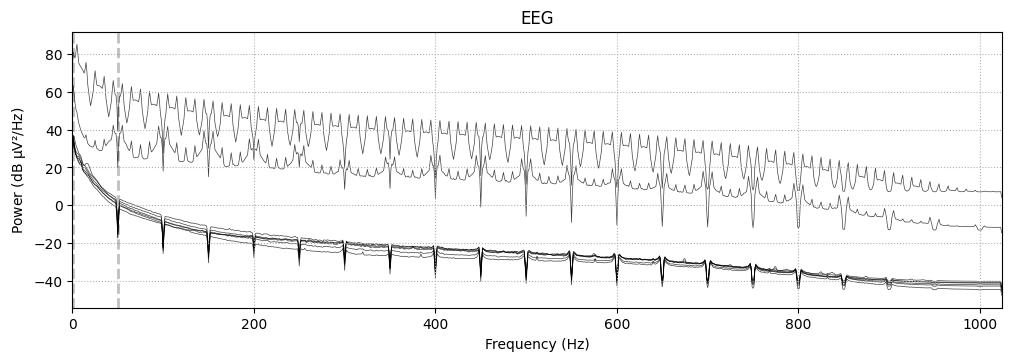

In [32]:
# plto PSD for all channels and save the figure
os.makedirs(f'{path_out}/hand_writing/{subj}/output/', exist_ok=True)

fig = raw_data.compute_psd().plot()
fig.savefig(f'{path_out}/hand_writing/{subj}/output/PSD.png', dpi = 300, bbox_inches = 'tight')

## Extract channel with triggers and compute the threshold

In [24]:
marks_ch='B'
marks_array=raw_data[marks_ch][0][0]
mean_=np.mean(raw_data[marks_ch][0][0])
std_=np.std(raw_data[marks_ch][0][0])

max_=mean_+0.3*std_
max_array_=[max_]*len(raw_data[marks_ch][0][0])

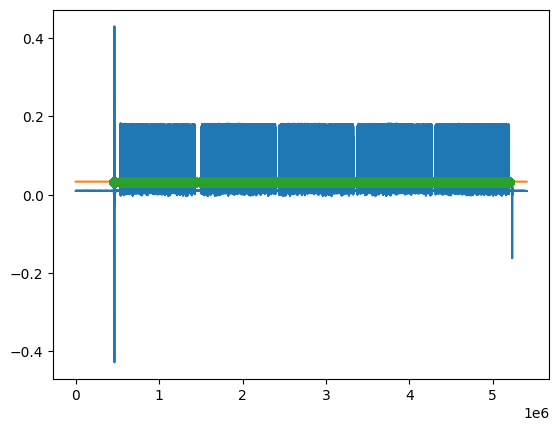

In [25]:
plt.plot(marks_array)
plt.plot(max_array_)
plt.plot(np.where(marks_array>max_)[0],[max_]*len(np.where(marks_array>max_)[0]),'o')

In [26]:
# Extracting triggers based on the threshold
marks_array_inds=np.where(marks_array>max_)[0]

In [27]:
# Take every FIFTH trigger and remove the starting trigger
new_marks_array_inds=[marks_array_inds[0]]
for i in range(1,len(marks_array_inds)):
    if marks_array_inds[i]-marks_array_inds[i-1]<5000:
        continue
    else:
        new_marks_array_inds.append(marks_array_inds[i])

new_marks_array_inds=new_marks_array_inds#[1:]

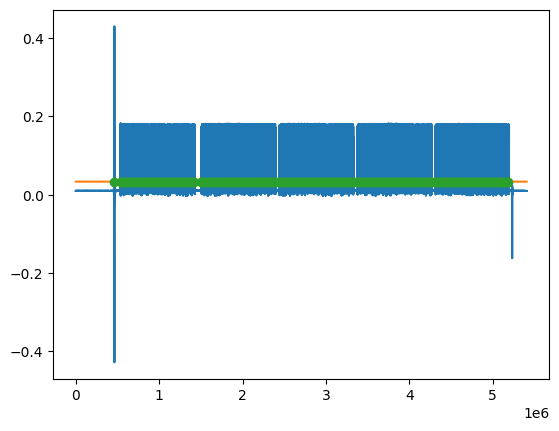

In [28]:
plt.plot(marks_array)
plt.plot(max_array_)
plt.plot(new_marks_array_inds,[max_]*len(new_marks_array_inds),'o')


## Creating events

In [33]:
# define time lags emirically (based on the graphs in scrtipt 3)
time_lags = {'S102': [.3, .3, .3, .3, .3],
             'S106': [6, 5, 5.7, 5.7, 5],
             'S107': [.5, .3, 0, 0, 0]}
time_lag = int(fs * time_lags[subj[code - 1]])

In [34]:
# Create events data structure
events_times=np.array(new_marks_array_inds)+first_samp+time_lag
events_zeros=np.zeros(len(new_marks_array_inds))
events_codes=np.zeros(len(new_marks_array_inds))

events=np.vstack([events_times,events_zeros,events_codes]).T.astype(int)

events_test=events.copy()
events_test[:,0]=events[:,0]

## Saving preprocessed raw data file and related events

In [36]:
os.makedirs(f'{path_out}/hand_writing/{subj}/preprocessed/Rec_{code}', exist_ok=True)
np.save(f'{path_out}/hand_writing/{subj}/preprocessed/Rec_{code}/events.npy',events_test)
raw_data.save(f'{path_out}/hand_writing/{subj}/preprocessed/Rec_{code}/first_raw.fif',overwrite=True)

Overwriting existing file.
Writing C:\skoltech_hand_writing\hand_writing\S106\preprocessed\Rec_5\first_raw.fif
Closing C:\skoltech_hand_writing\hand_writing\S106\preprocessed\Rec_5\first_raw.fif
[done]
